# Quantify the effect of GoalLeaning Heuristics

In this notebook, we try to quantify the effect of goal-leaning heuristic on the improvement in mission performance. Specifically, we try to calculate the expected time steps to reach a target in a specific environment for both GoalLeaningES solver and BasicES solver and support the results obtained in this study with instances showing behavior of the agent leading to a near-optimal behavior.

The animate_simulation function below is different from the animate_simulation method available in SingleAgentEnv class. This function, defined in uuvmodel.py, returns the animation, state data, and energy data to help with creating static plots of events of interest. To create these plots, observe the animation below and note down the time steps for frames that one intends to see in the static plot. These time steps can be enteres in the visualize_snapshots function below which creates a figure with subplots showing all the snapshots. 

In [1]:
# setup the notebook
from fimdpenv import setup
setup()

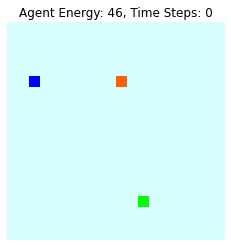

In [2]:
# create test environment
from uuvmodel import create_env
env = create_env('1R-1T-simple', capacity=46)
env

## Comparison - BasicES, GoalLeaningES, and GoalLeaningES with threshold

In [3]:
# visualize BasicES and GoalLeaningES
from uuvmodel import animate_simulation, calc_exptimetotarget, visualize_multisnapshots
from fimdp.energy_solvers import GoalLeaningES, BasicES
from fimdp.objectives import AS_REACH, BUCHI, MIN_INIT_CONS, POS_REACH, SAFE

### BasicES

In [11]:
# BasicES
env.create_counterstrategy(solver=BasicES, objective=BUCHI)
anim, im_basic, energy_basic = animate_simulation(env, num_steps=50)
anim

As you can see in the above visualization, the solution obtained using BasicES, while acting safely, does not try to achieve the optimal path to the agent. Further, for the same reason, the expected number of time steps to first reach the target cannot be calculated in this case.

### GoalLeaningES without Threshold

In [13]:
# GoalLeaningES with threshold = 0
env.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0)
anim, im_gl00, energy_gl00 = animate_simulation(env, num_steps=50)
anim

The above animation shows the solution obtained using GoalLeaningES solver without a threshold (or equivalently a threshold of 0). Below, we see that the strategy obtained using this solver takes on average about 116 time steps to visit the target for the first time.

In [14]:
calc_exptimetotarget(env, num_runs=1000)

116.76

### GoalLeaningES with Threshold 0.1

In [41]:
# GoalLeaningES with threshold = 0.1
env.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0.1)
anim, im_gl01, energy_gl01 = animate_simulation(env, num_steps=50)
anim

The the above animation, we observe a trajectory of an agent following a strategy obtained using the GoalLeaningES solver with a threshold of 0.1. Clearly, the agent takes a near-optimal optimal path via the nearest reload state to reach the target. As a consequence, the expected number of time steps to visit the target for the first time is significantly lower in this case (about 60 time steps as seen below).

In [36]:
calc_exptimetotarget(env, num_runs=1000)

60.858

### Visualizing snapshots from different solvers

The code below uses the data obtained from different solves above and provides a snapshot comparing the agent behavior at different time instances for differeny energy-solvers. Users can specify the number of snapshots and the time instances at which the want the snapshots for different solvers.

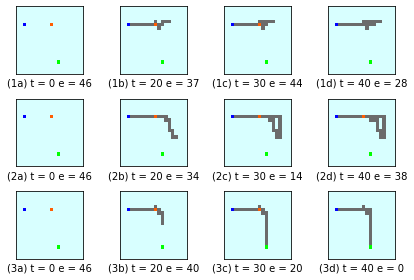

In [46]:
from uuvmodel import visualize_multisnapshots

im_history = [im_basic, im_gl00, im_gl01]
energy_history = [energy_basic, energy_gl00, energy_gl01]
snapshot_indices = [[0, 20, 30, 40],[0, 20, 30, 40],[0, 20, 30, 40]]
visualize_multisnapshots(im_history, energy_history, snapshots_indices=snapshot_indices, annotate=True)